In [1]:
from halomodelpy import hm_calcs, redshift_helper

/home/graysonpetter/ssd/Dartmouth/common_tools/HaloModelPy/halomodelpy/cosmo.py:33: SyntaxWarning: invalid escape sequence '\e'
  """


Simulate normal z distribution

Text(0.5, 0, '$z$')

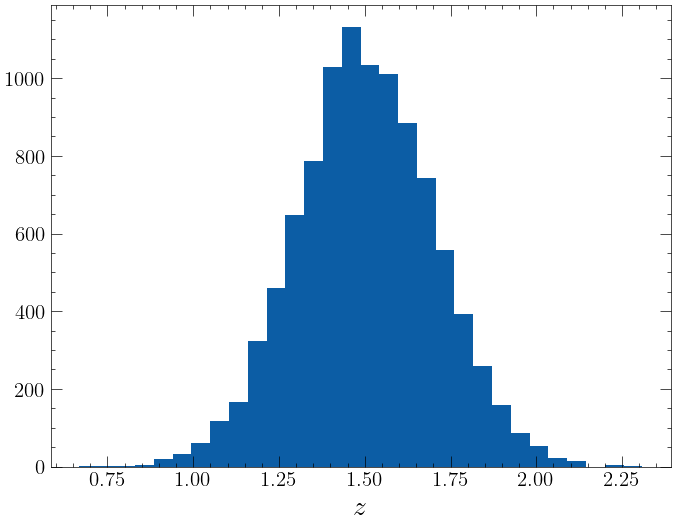

In [2]:
randzs = np.random.normal(1.5, 0.2, 10000)
plt.hist(randzs, bins=30)
plt.xlabel('$z$')

In [3]:
dndz = redshift_helper.dndz_from_z_list(randzs, nbins=20)

In [4]:
halomod = hm_calcs.halomodel(dndz)

TypeError: 'MassDef' object is not callable

Clustering showcase

Text(0, 0.5, '$\\xi(r)$')

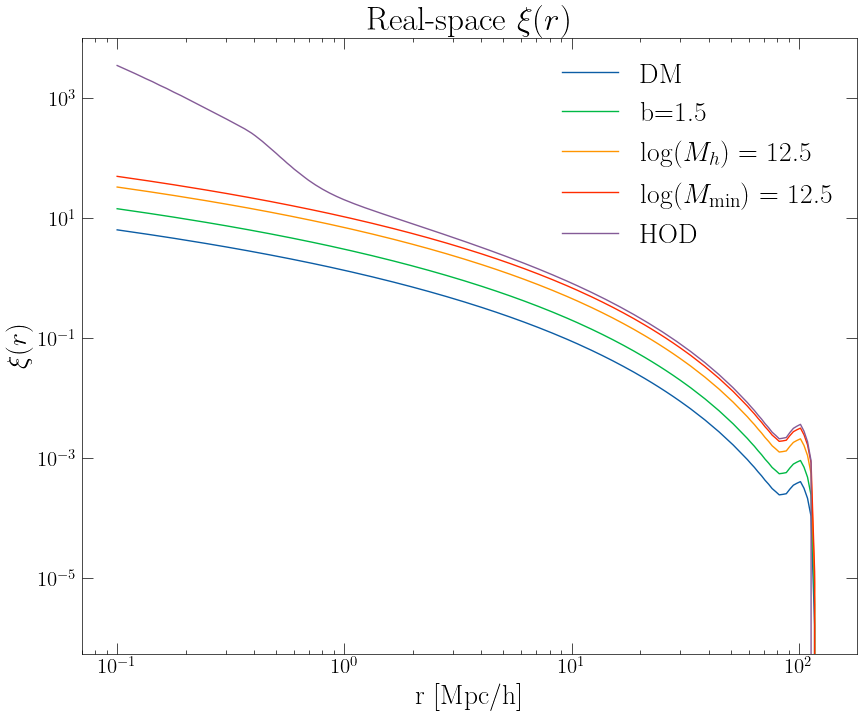

In [5]:
fig = plt.figure(figsize=(10, 8))
rs = np.logspace(-1, 2.1, 200)

plt.title(r'Real-space $\xi(r)$')

# defaults to DM power spectrum
halomod.set_powspec()
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label='DM')

halomod.set_powspec(bias1=1.5)
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label='b=1.5')

halomod.set_powspec(log_meff=12.5)
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label='log($M_h$) = 12.5')

halomod.set_powspec(log_m_min1=12.5)
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label='log($M_{\mathrm{min}}$) = 12.5')

halomod.set_powspec(hodparams=[12.6, 0.0001, 12.6, 14., 1.])
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label='HOD')

plt.legend(fontsize=20)
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi(r)$')

Text(0, 0.5, '$w_p (r_p)$')

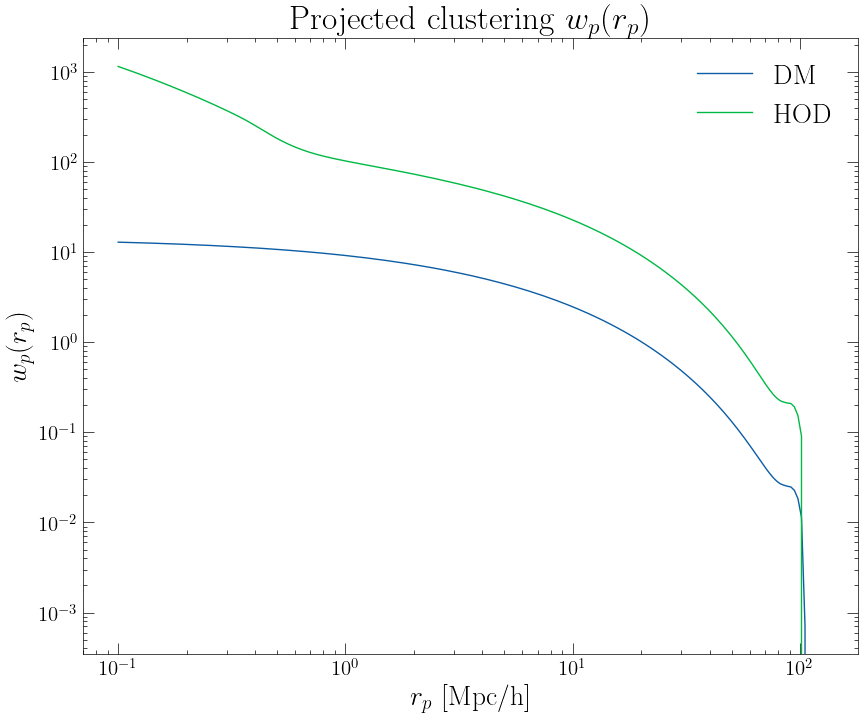

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.title('Projected clustering $w_p (r_p)$')
rs = np.logspace(-1, 2.1, 200)
halomod.set_powspec()
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=True), label='DM')

halomod.set_powspec(hodparams=[12.6, 0.0001, 12.6, 14., 1.])
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=True), label='HOD')


plt.legend(fontsize=20)
plt.xlabel('$r_p$ [Mpc/h]')
plt.ylabel(r'$w_p (r_p)$')

Text(0, 0.5, '$w(\\theta)$')

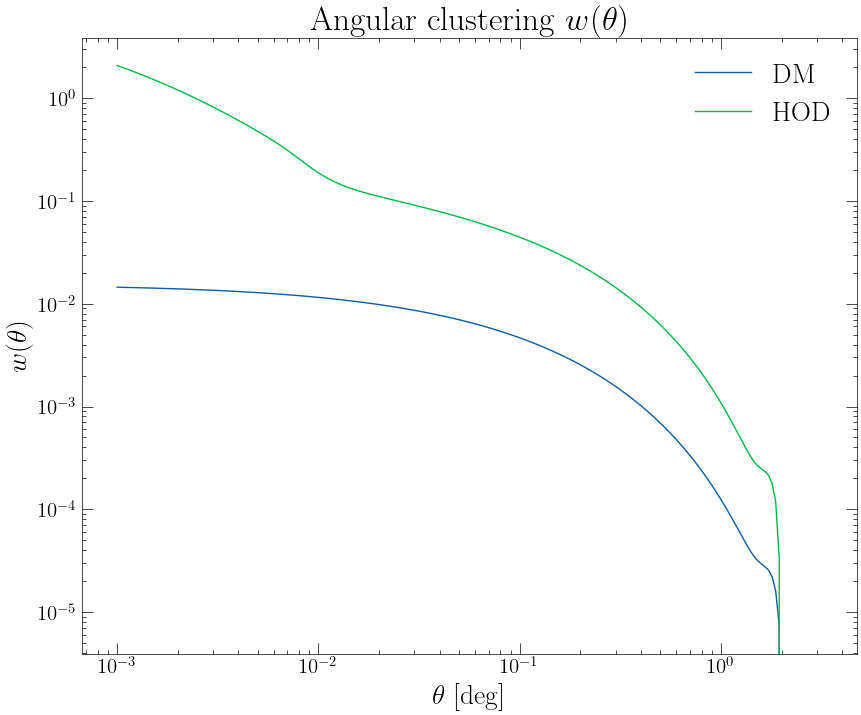

In [7]:
fig = plt.figure(figsize=(10, 8))
plt.title(r'Angular clustering $w(\theta)$')
thetas = np.logspace(-3, 0.5, 200)
halomod.set_powspec()
plt.loglog(thetas, halomod.get_ang_cf(thetas), label='DM')

halomod.set_powspec(hodparams=[12.6, 0.0001, 12.6, 14., 1.])
plt.loglog(thetas, halomod.get_ang_cf(thetas), label='HOD')


plt.legend(fontsize=20)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$w(\theta)$')

Text(0, 0.5, '$\\xi(r)$')

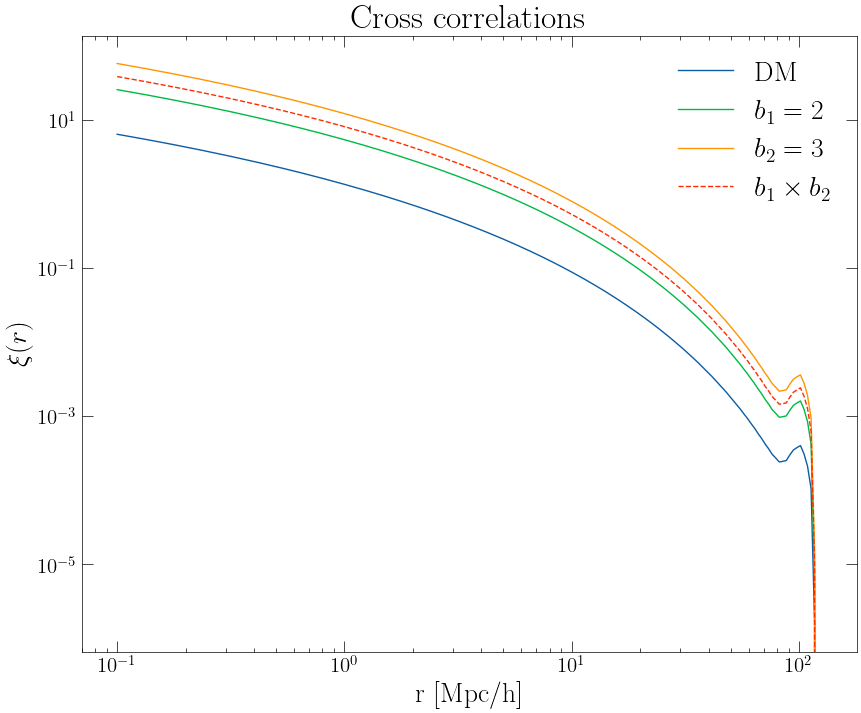

In [8]:
fig = plt.figure(figsize=(10, 8))
plt.title(r'Cross correlations')
halomod.set_powspec()
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label='DM')

halomod.set_powspec(bias1=2)
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label=r'$b_1=2$')

halomod.set_powspec(bias1=3)
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label=r'$b_2=3$')

halomod.set_powspec(bias1=2, bias2=3)
plt.loglog(rs, halomod.get_spatial_cf(rs, projected=False), label=r'$b_1 \times b_2$', ls='--')


plt.legend(fontsize=20)
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi(r)$')

Text(0, 0.5, '$C_{\\ell}$')

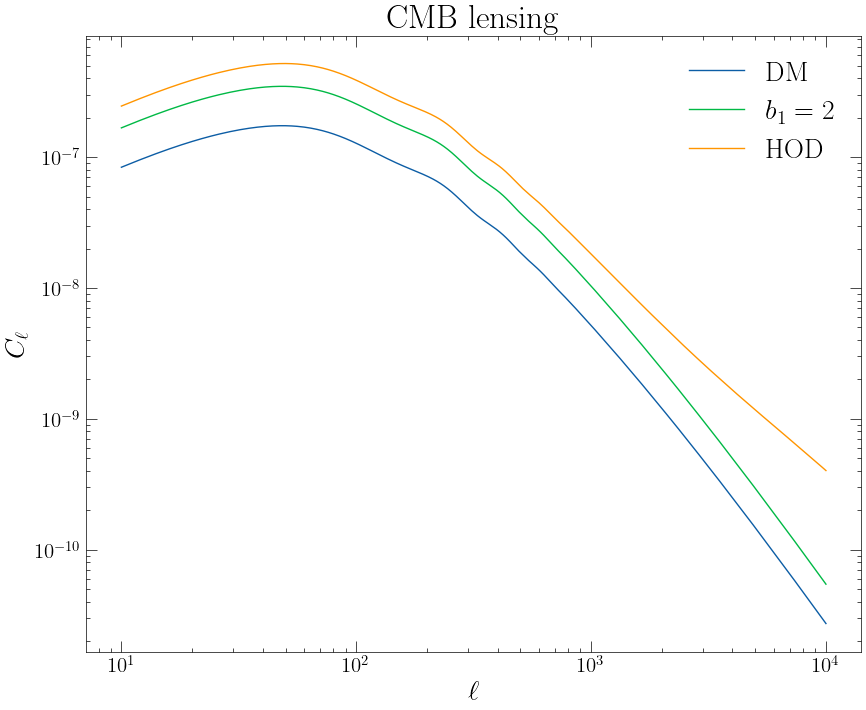

In [9]:
ells = np.arange(10, 10000)
fig = plt.figure(figsize=(10, 8))
plt.title(r'CMB lensing')
halomod.set_powspec()
plt.loglog(ells, halomod.get_c_ell_kg(ells), label='DM')

halomod.set_powspec(bias1=2)
plt.loglog(ells, halomod.get_c_ell_kg(ells), label=r'$b_1=2$')


halomod.set_powspec(hodparams=[12.6, 0.0001, 12.6, 14., 1.])
plt.loglog(ells, halomod.get_c_ell_kg(ells), label='HOD')


plt.legend(fontsize=20)
plt.xlabel('$\ell$')
plt.ylabel(r'$C_{\ell}$')

Text(0, 0.5, '$\\xi_0 (s)$')

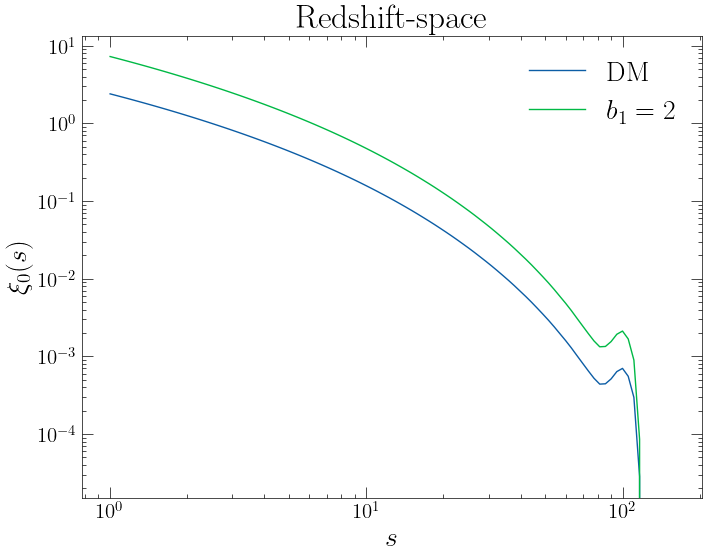

In [10]:
s = np.logspace(0., 2.2, 100)
halomod.set_powspec()
plt.loglog(s, halomod.get_multipole(s, ell=0), label='DM')

halomod.set_powspec(bias1=2.)
plt.loglog(s, halomod.get_multipole(s, ell=0), label=r'$b_1=2$')

plt.title(r'Redshift-space')

plt.legend(fontsize=20)
plt.xlabel('$s$')
plt.ylabel(r'$\xi_0 (s)$')

Text(0, 0.5, '$\\xi_2 (s)$')

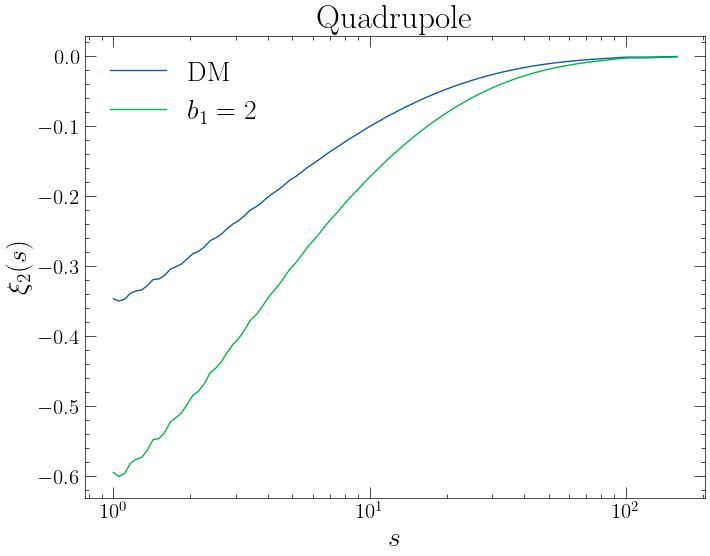

In [11]:
s = np.logspace(0., 2.2, 100)
halomod.set_powspec()
plt.plot(s, halomod.get_multipole(s, ell=2), label='DM')

halomod.set_powspec(bias1=2.)
plt.plot(s, halomod.get_multipole(s, ell=2), label=r'$b_1=2$')

plt.title(r'Quadrupole')

plt.xscale('log')
plt.legend(fontsize=20)
plt.xlabel('$s$')
plt.ylabel(r'$\xi_2 (s)$')

Anisotropic clustering

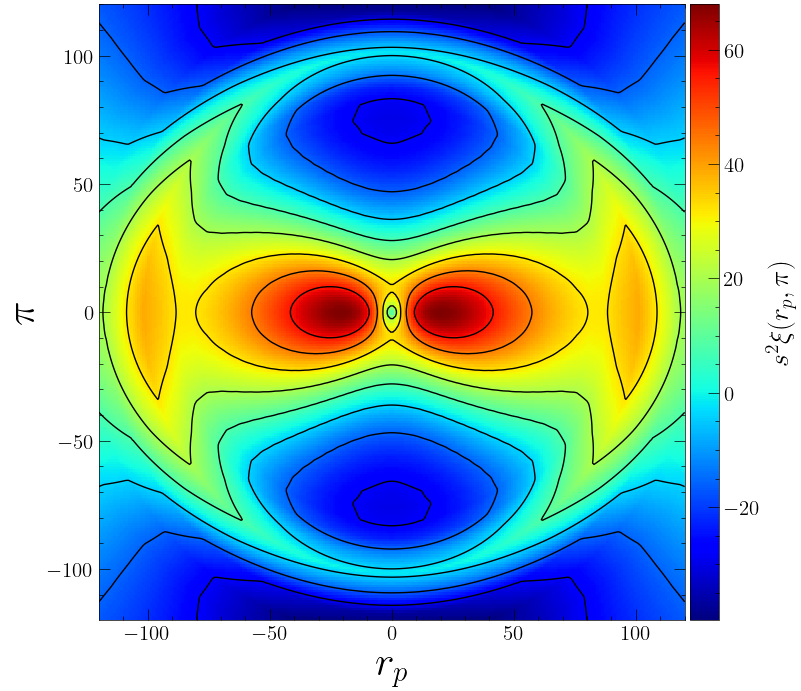

In [12]:
from corrfunc_helper import plots
rps = np.linspace(1., 120, 120)
pis = rps
plots.plot_s2_xi(halomod.get_xi_rp_pi(rps, pis), smooth=0, pis=rps, rps=pis)

Simulate redshift errors 

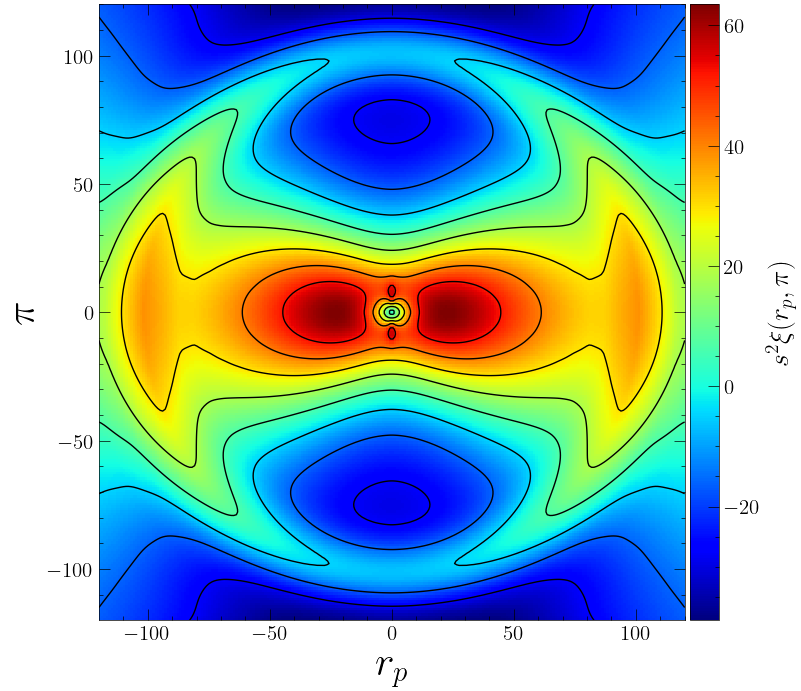

In [13]:
from corrfunc_helper import plots
rps = np.linspace(1., 120, 120)
pis = rps
plots.plot_s2_xi(halomod.get_xi_rp_pi(rps, pis, sigz=0.003), smooth=0, pis=rps, rps=pis)

In [16]:
importlib.reload(hm_calcs)
rps = np.linspace(1., 40., 1000)
pis = rps
noerr = halomod.get_xi_s(rps, pis, np.logspace(0., 1.5, 30), wedges=2, mono=True, quad=False, hexa=False)
erred = halomod.get_xi_s(rps, pis, np.logspace(0., 1.5, 30), sigz=0.003, wedges=2, mono=True, quad=False, hexa=False)

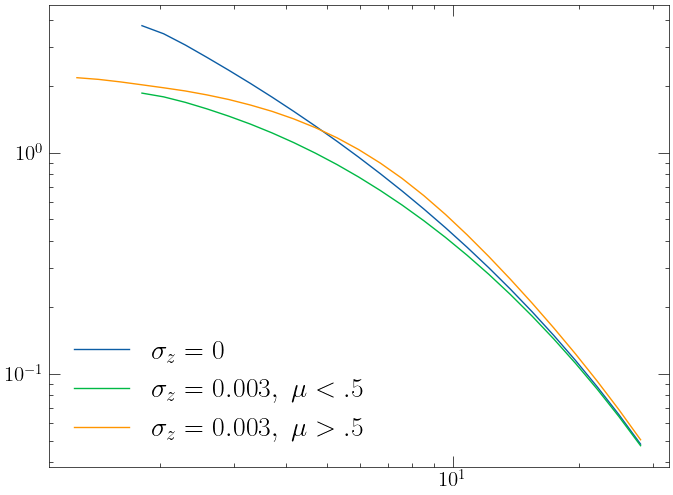

In [17]:
plt.loglog(np.logspace(0., 1.5, 30)[:-1], noerr[0], label=r'$\sigma_z = 0$')
#plt.loglog(np.logspace(0., 1.5, 30)[:-1], noerr[1], label=r'$\sigma_z = 0$')
plt.loglog(np.logspace(0., 1.5, 30)[:-1], erred[0], label=r'$\sigma_z = 0.003, \ \mu < .5$')
plt.loglog(np.logspace(0., 1.5, 30)[:-1], erred[1], label=r'$\sigma_z = 0.003, \  \mu > .5$')
plt.legend()

Show MCMC HOD fitting

Generate model with simulated errors

Text(0, 0.5, '$w(\\theta)$')

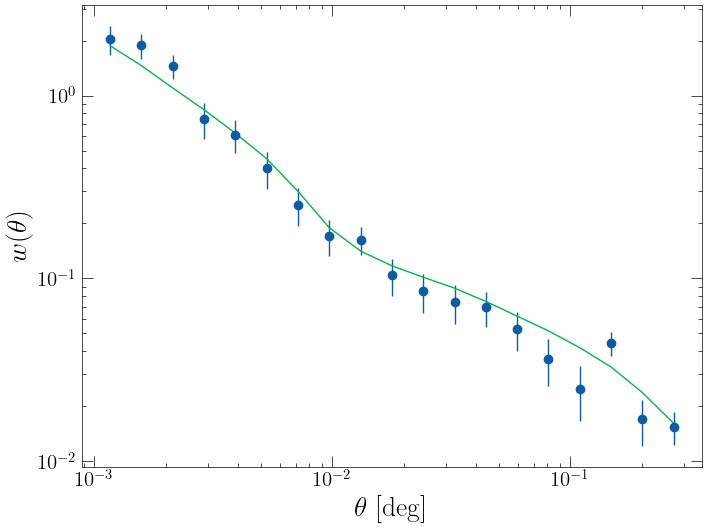

In [18]:
from halomodelpy import interpolate_helper
thetabins = np.logspace(-3, -0.5, 20)
halomod.set_powspec(hodparams=[12.6, 0.0001, 12.6, 14., 1.])
modcf = halomod.get_binned_ang_cf(thetabins)
effthetas = interpolate_helper.bin_centers(thetabins, 'geo_mean')
perturbed = np.random.normal(modcf, modcf/5., len(modcf))
plt.errorbar(effthetas, perturbed, modcf/5., fmt='o')
plt.plot(effthetas, modcf)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$w(\theta)$')

In [19]:
cf = {'theta_bins': thetabins, 'w_theta': perturbed, 'w_err': modcf/5.}

In [20]:
from halomodelpy import clustering_fit

In [21]:
mcfit = clustering_fit.fitmcmc(nwalkers=10, niter=100, dndz=dndz, cf=cf, freeparam_ids=['M', 'M1', 'alpha'], initial_params=[12.6, 14., 1.])

100%|█████████████████████████████████████████| 100/100 [01:02<00:00,  1.59it/s]


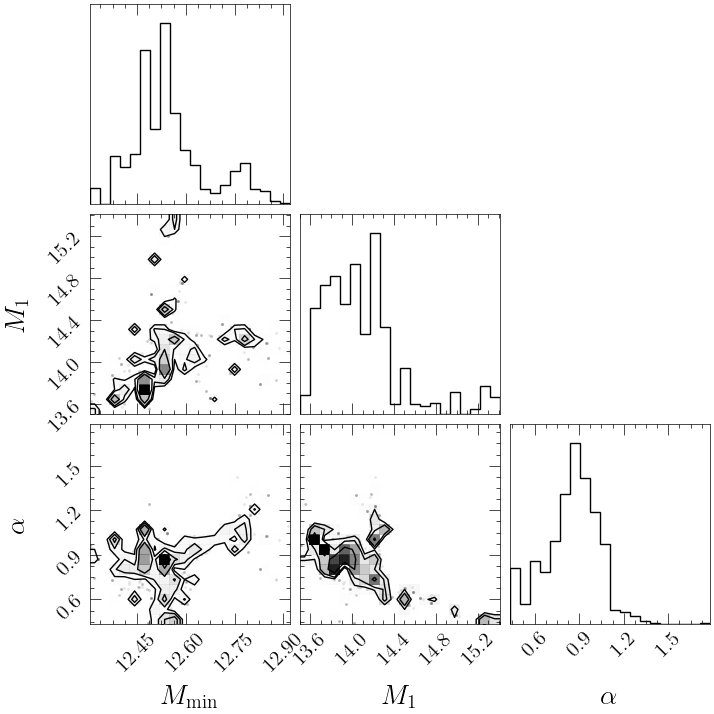

In [22]:
mcfit['corner']

Now perform a fit over linear scales using an effective bias/mass model

Text(0, 0.5, '$w(\\theta)$')

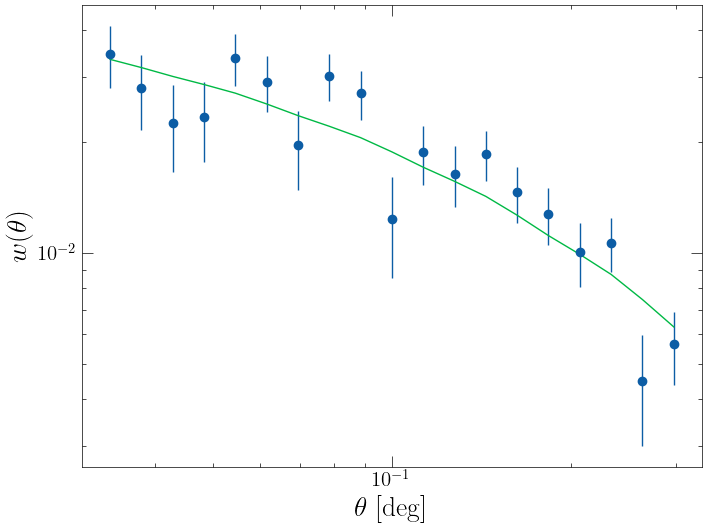

In [22]:
from halomodelpy import interpolate_helper
thetabins = np.logspace(-1.5, -0.5, 20)
halomod.set_powspec(bias1=2.)
modcf = halomod.get_binned_ang_cf(thetabins)
effthetas = interpolate_helper.bin_centers(thetabins, 'geo_mean')
perturbed = np.random.normal(modcf, modcf/5., len(modcf))
plt.errorbar(effthetas, perturbed, modcf/5., fmt='o')
plt.plot(effthetas, modcf)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$w(\theta)$')

In [23]:
cf = {'theta': interpolate_helper.bin_centers(thetabins, 'geo_mean'), 'theta_bins': thetabins, 'w_theta': perturbed, 'w_err': modcf/5.}
fit = clustering_fit.fit_pipeline(dndz, cf)

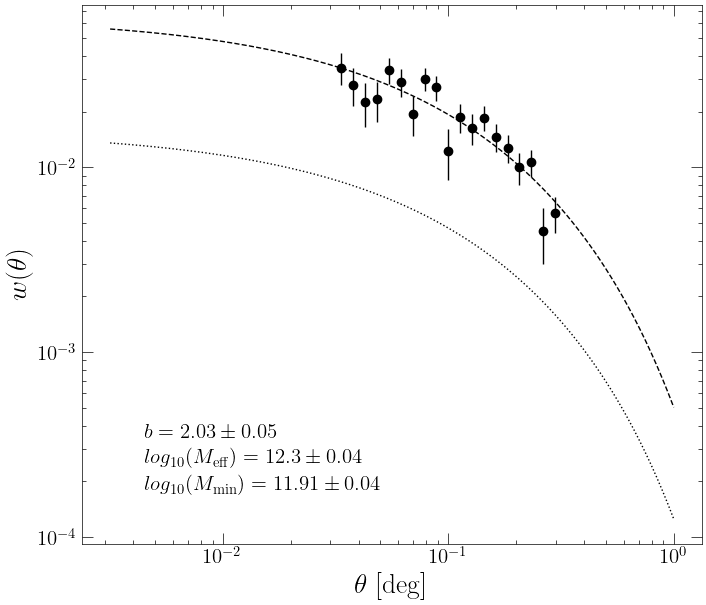

In [24]:
fit['plot']